<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework.  
#We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.shape

(90, 18)

In [5]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [6]:
df.corr(method='pearson', numeric_only=True)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


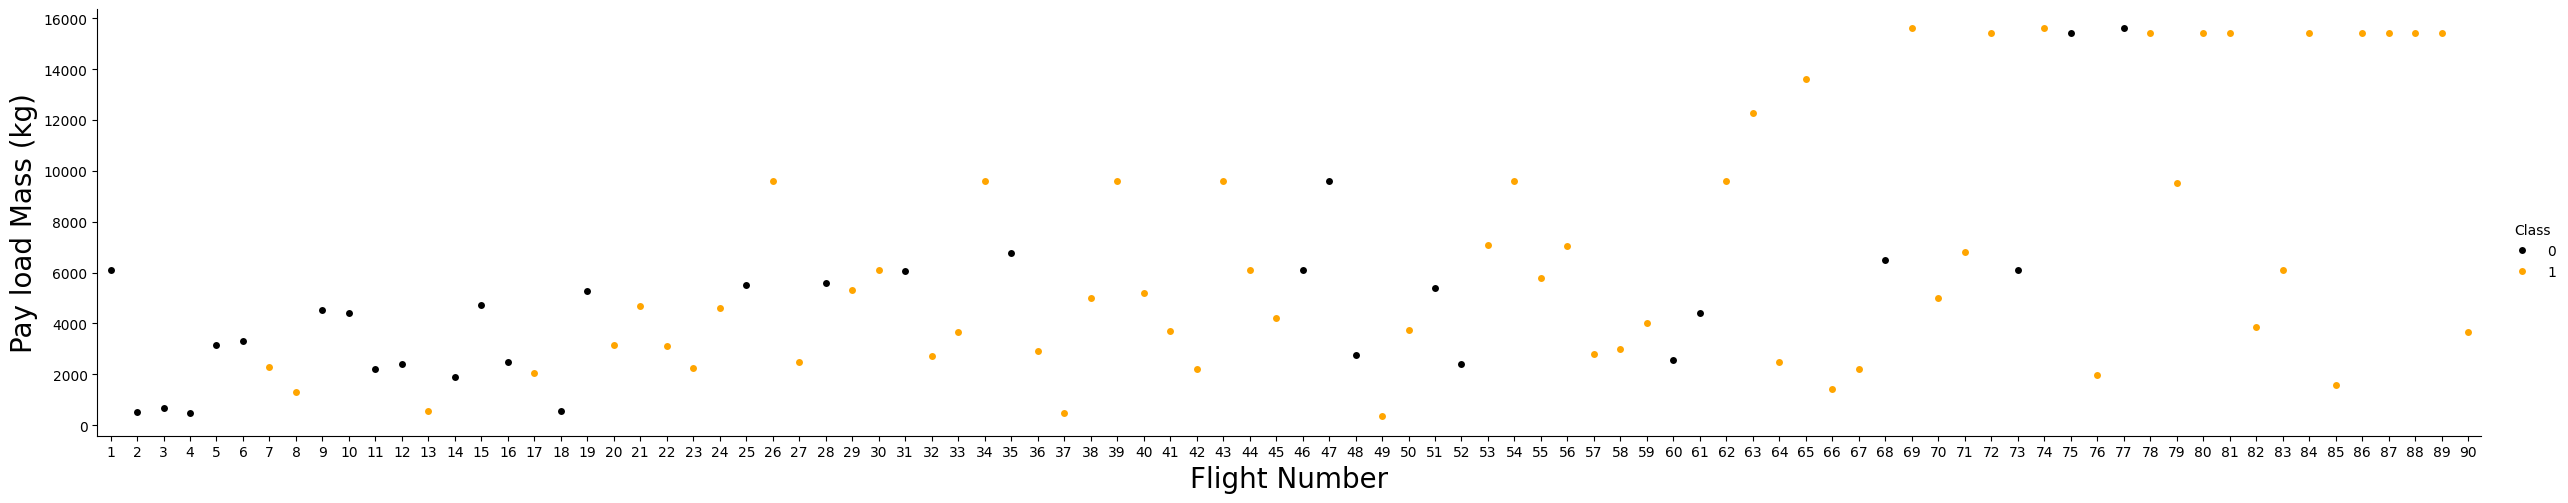

In [7]:
# Define a custom color palette
palette = {0: 'black', 1: 'orange'}

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5, palette=palette)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show();

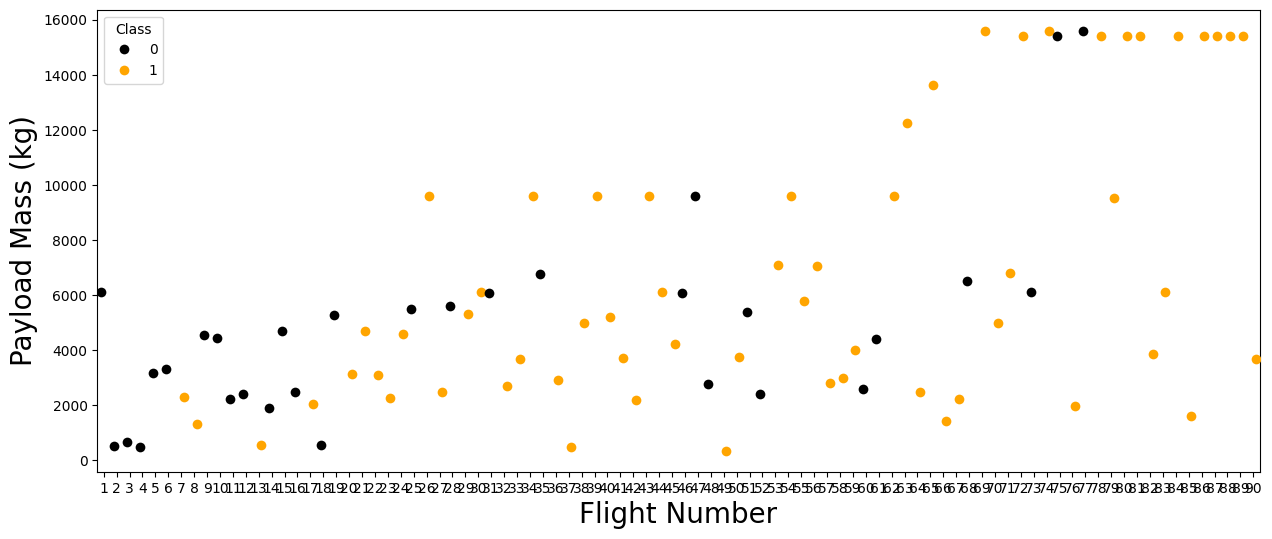

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
palette = {0: 'black', 1: 'orange'}

# Create a strip plot with increased point size
plt.figure(figsize=(15, 6))  # Adjust the figure size if needed
sns.stripplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, 
               palette=palette, size=7, jitter=True, dodge=True)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.legend(title='Class')
plt.show();

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


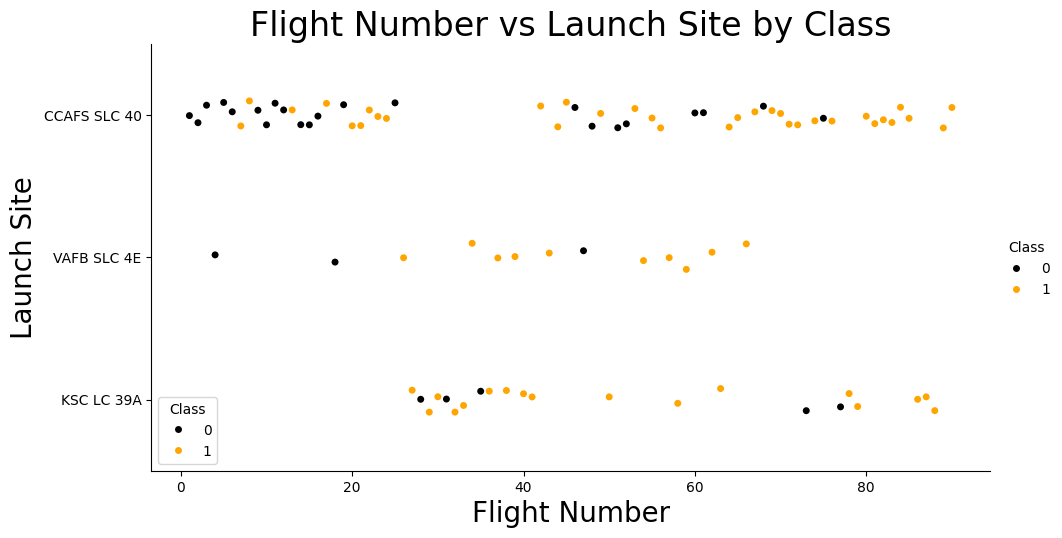

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Define a custom color palette (optional)
palette = {0: 'black', 1: 'orange'}

# Create the catplot
sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=2,  # Adjust aspect ratio for better visualization
    palette=palette,
    kind='strip'  # You can use 'strip' or 'swarm' for different visual styles
)

# Set labels and title
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site by Class", fontsize=24)
plt.legend(title='Class')
plt.show();

In [10]:
# Count success and failure by LaunchSite
count_by_site = df.groupby(['LaunchSite', 'Class']).size().unstack(fill_value=0)

# Rename columns for clarity
count_by_site.columns.name = None  # Remove the name of the columns
count_by_site = count_by_site.rename(columns={0: 'Failure', 1: 'Success'})

# Calculate total launches for each launch site
count_by_site['Total'] = count_by_site['Success'] + count_by_site['Failure']

# Calculate percentages
count_by_site['Success (%)'] = (count_by_site['Success'] / count_by_site['Total']) * 100
count_by_site['Failure (%)'] = (count_by_site['Failure'] / count_by_site['Total']) * 100

# Drop the Total column if you only want percentages
count_by_site = count_by_site.drop(columns=['Total'])

# Display the result
print(count_by_site)

              Failure  Success  Success (%)  Failure (%)
LaunchSite                                              
CCAFS SLC 40       22       33    60.000000    40.000000
KSC LC 39A          5       17    77.272727    22.727273
VAFB SLC 4E         3       10    76.923077    23.076923


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


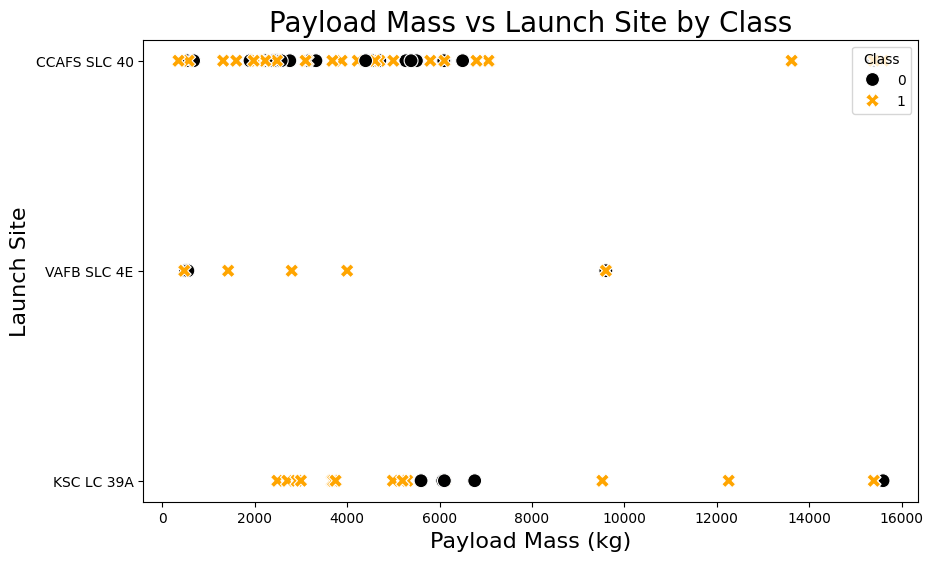

In [11]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Define the custom color palette
xpalette = {0: 'black', 1: 'orange'}
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(
    x="PayloadMass", 
    y="LaunchSite",
    hue="Class",
    data=df,
    palette=xpalette,
    s=100,  # Adjust the size of the points
    style="Class",
    markers=["o", "X"]  # Specify markers for each class
)

# Set labels and title
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)
plt.title("Payload Mass vs Launch Site by Class", fontsize=20)
plt.legend(title='Class', loc='upper right')
plt.show();

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Map success and failure to numerical values
df['ClassNum'] = df['Class'].map({'Success': 1, 'Failure': 0})

# Calculate success rates using groupby
success_rates = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename the columns for clarity
success_rates.columns = ['Orbit', 'Success_Rate']

# Convert success rate to percentage
success_rates['Success_Rate'] *= 100

# Sort by descending order
sorted_df = success_rates.sort_values(by='Success_Rate', ascending=False).reset_index()

# Display the success rates DataFrame
sorted_df

,index,Orbit,Success_Rate
0,0,ES-L1,100.000000
1,1,GEO,100.000000
2,3,HEO,100.000000
3,9,SSO,100.000000
4,10,VLEO,85.714286
5,5,LEO,71.428571
6,6,MEO,66.666667
7,7,PO,66.666667
8,4,ISS,61.904762
9,2,GTO,51.851852


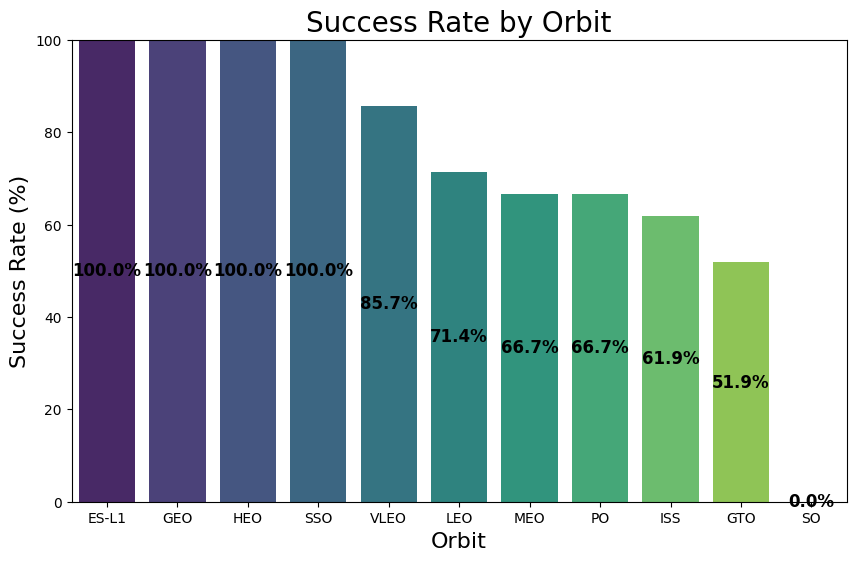

In [13]:
# Create the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='Orbit', 
    y='Success_Rate', 
    data=sorted_df,
    hue='Orbit',
    legend = False,
    palette='viridis'  # You can choose a different palette if desired
)

# Set labels and title
plt.xlabel("Orbit", fontsize=16)
plt.ylabel("Success Rate (%)", fontsize=16)
plt.title("Success Rate by Orbit", fontsize=20)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%

# Annotate bars with percentage labels
# Annotate bars with percentage labels in the middle
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Position in the middle of the bar
                      ha='center', 
                      va='center', 
                      fontsize=12, 
                      fontweight='bold')  # Set font weight to bold

plt.show();

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


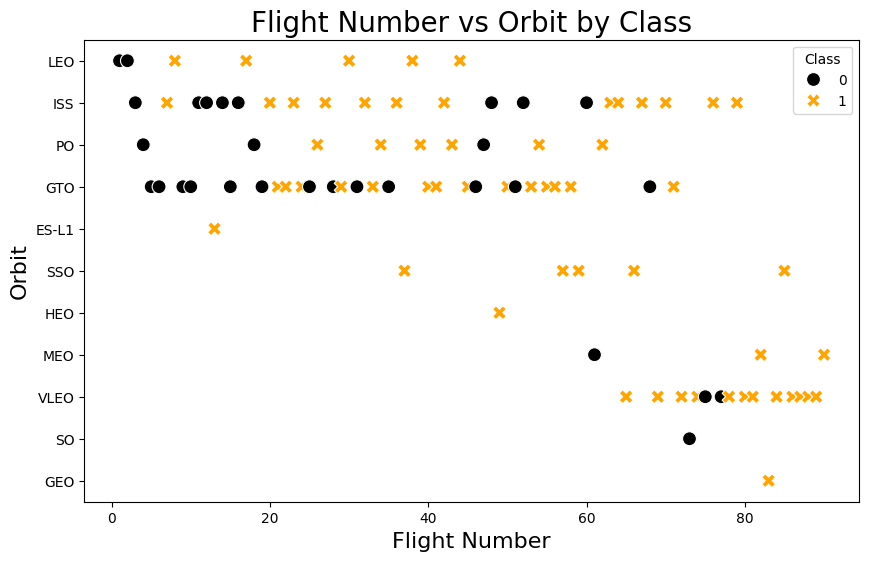

In [14]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.scatterplot(
    x="FlightNumber", 
    y="Orbit",
    hue="Class",
    data=df,
    palette={0: 'black', 1: 'orange'},  # Use a custom palette if desired
    s=100,  # Adjust the size of the points
    style="Class",  # Differentiate points by style if desired
    markers=["o", "X"]  # Specify markers for each class
)

# Set labels and title
plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Orbit", fontsize=16)
plt.title("Flight Number vs Orbit by Class", fontsize=20)
plt.legend(title='Class')
plt.show();

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


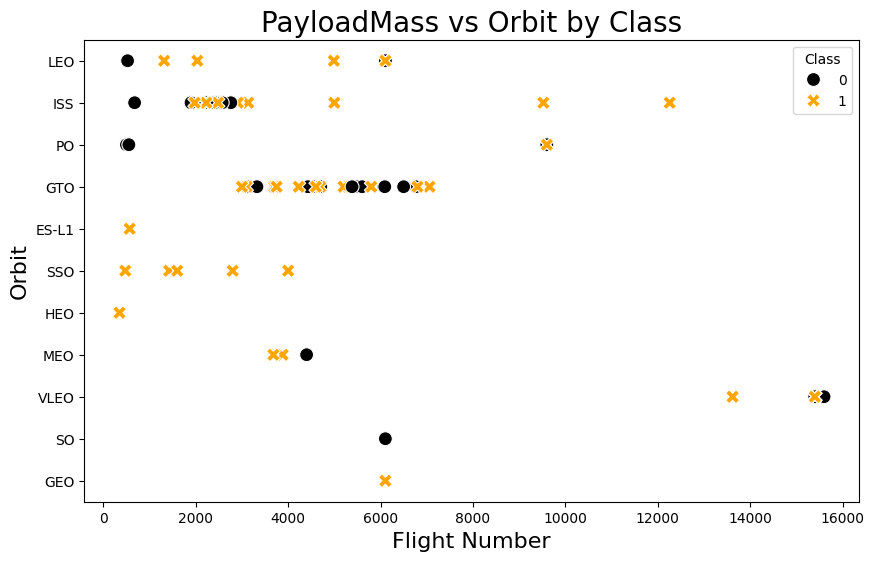

In [15]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.scatterplot(
    x="PayloadMass", 
    y="Orbit",
    hue="Class",
    data=df,
    palette={0: 'black', 1: 'orange'},  # Use a custom palette if desired
    s=100,  # Adjust the size of the points
    style="Class",  # Differentiate points by style if desired
    markers=["o", "X"]  # Specify markers for each class
)

# Set labels and title
plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Orbit", fontsize=16)
plt.title("PayloadMass vs Orbit by Class", fontsize=20)
plt.legend(title='Class')
plt.show();

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year   

   Year     Class  Success_Rate
0  2010  0.000000      0.000000
1  2012  0.000000      0.000000
2  2013  0.000000      0.000000
3  2014  0.333333     33.333333
4  2015  0.333333     33.333333
5  2016  0.625000     62.500000
6  2017  0.833333     83.333333
7  2018  0.611111     61.111111
8  2019  0.900000     90.000000
9  2020  0.842105     84.210526


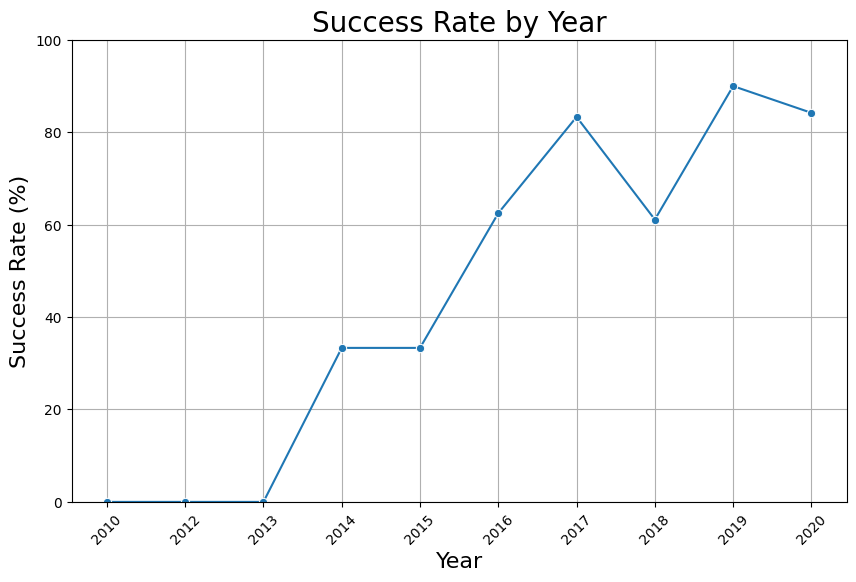

In [17]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Extract years and add to the DataFrame
df['Year'] = Extract_year(df)

# Calculate success rates by year
success_rates = df.groupby('Year')['Class'].mean().reset_index()

# Convert success rate to percentage
success_rates['Success_Rate'] = success_rates['Class'] * 100

# Display the success rates DataFrame
print(success_rates)

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year', 
    y='Success_Rate', 
    data=success_rates,
    marker='o'  # Optional: add markers to the line
)

# Set labels and title
plt.xlabel("Year", fontsize=16)
plt.ylabel("Success Rate (%)", fontsize=16)
plt.title("Success Rate by Year", fontsize=20)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid()  # Optional: add grid for better readability
plt.show();

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(3)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007


In [19]:
features.shape

(90, 12)

In [20]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [21]:
# HINT: Use get_dummies() function on the categorical columns
categorical_columns = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the list of categorical columns
print(categorical_columns)

['Orbit', 'LaunchSite', 'LandingPad', 'Serial']


In [22]:
# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply one-hot encoding to categorical columns
features_one_hot = pd.get_dummies(features, columns=categorical_cols, drop_first=False)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
features_one_hot.shape

(90, 80)

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [25]:
# HINT: use astype function
# Cast numeric columns to float64
numeric_cols = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount']
concat_df[numeric_cols] = concat_df[numeric_cols].astype('float64')

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
